In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\airline-passenger-traffic+(1).csv")

In [3]:
df

,1949-01,112
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0
...,...,...
138,1960-08,606.0
139,1960-09,508.0
140,1960-10,461.0
141,1960-11,390.0


In [4]:
df.columns = ['Month','Passenger']
df['Month'] = pd.to_datetime(df['Month'],format="%Y-%m")
df = df.set_index('Month')

In [5]:
df.head(10)

,Passenger
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0
1949-10-01,119.0


## Time Series Analysis

### Plotting time series data

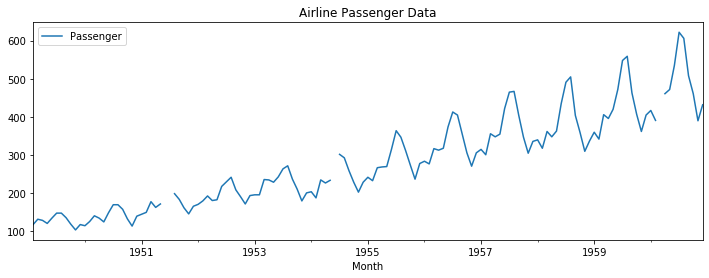

In [6]:
df.plot(figsize=(12,4))
plt.title("Airline Passenger Data")
plt.legend(loc='best')
plt.show()

### Missing Value Treatment

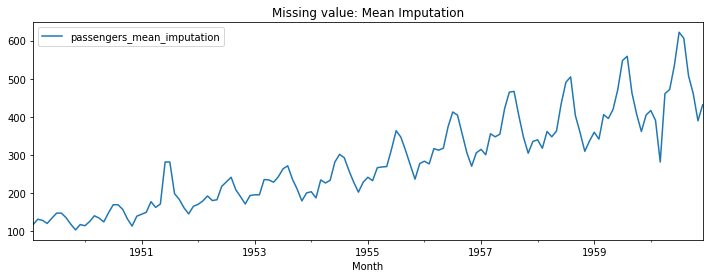

In [7]:
# Mean Impuation
df = df.assign(passengers_mean_imputation = df['Passenger'].fillna(df['Passenger'].mean()))
df[['passengers_mean_imputation']].plot(figsize=(12,4))
plt.title("Missing value: Mean Imputation")
plt.legend(loc='best')
plt.show(block=False)

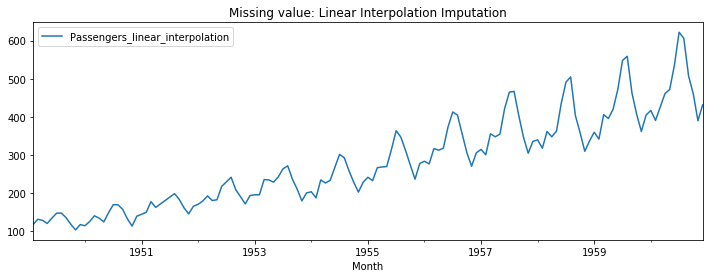

In [8]:
# Linear Interpolation
df = df.assign(Passengers_linear_interpolation = df['Passenger'].interpolate(method = 'linear'))
df[['Passengers_linear_interpolation']].plot(figsize=(12,4))
plt.title("Missing value: Linear Interpolation Imputation")
plt.legend(loc='best')
plt.show(block=False)

In [9]:
df['Passenger'] = df['Passengers_linear_interpolation']

### Outliers Detection

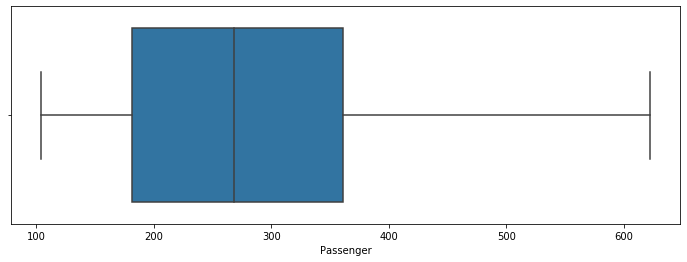

In [10]:
# Box lot and interquartile range
fig = plt.subplots(figsize = (12,4))
ax = sns.boxplot(x =df['Passenger'], whis = 1.5)

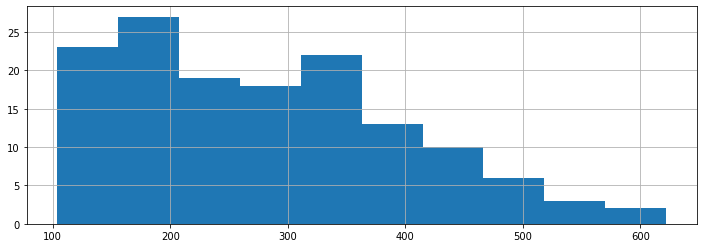

In [11]:
# Histogram
fig = df['Passenger'].hist(figsize=(12,4))

## Time Series Decomposition

### Additive Seasonal Decomposition

In [12]:
from pylab import rcParams
import statsmodels.api as sm

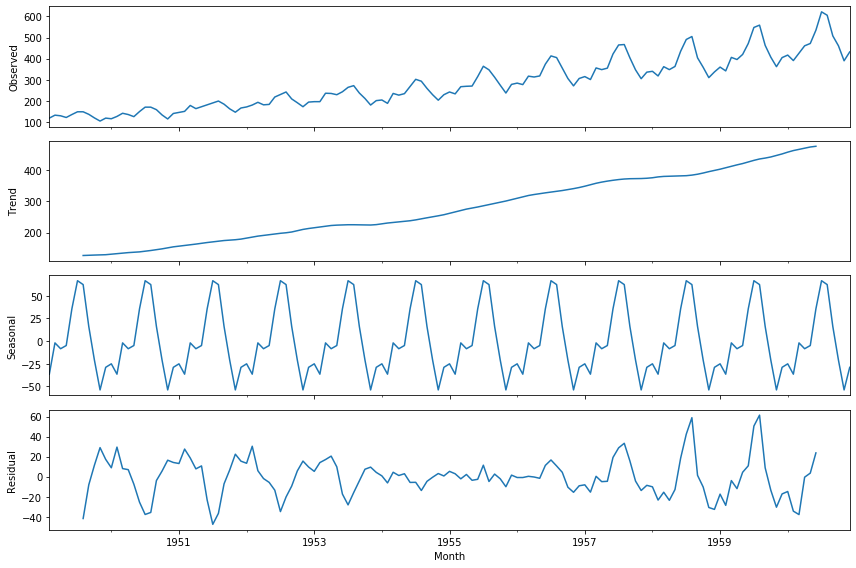

In [13]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df['Passenger'],model='additive')
fig = decomposition.plot()
plt.show()

### Multiplicative Seasonal Decomposition 

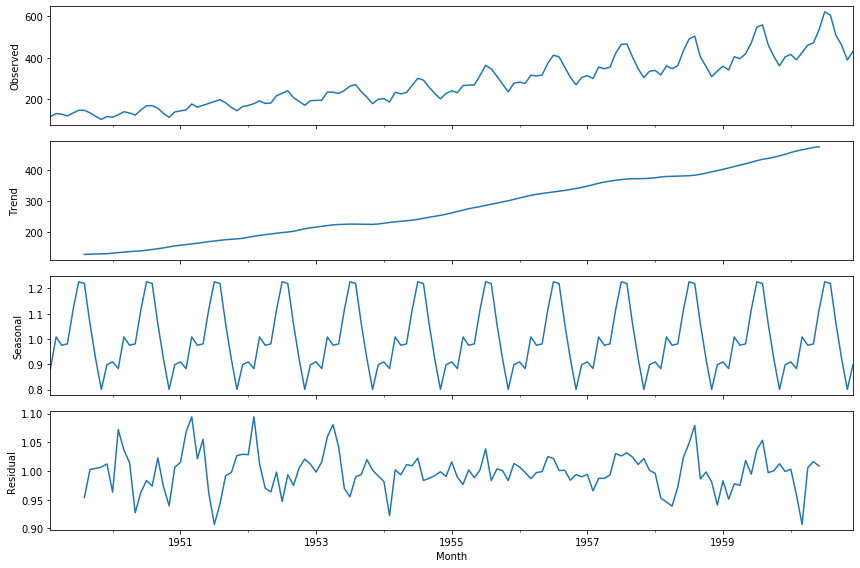

In [14]:
decomposition = sm.tsa.seasonal_decompose(df['Passenger'],model = 'multiplicative')
fig = decomposition.plot()
plt.show()

## Building and Evaluate Time Series Forecast Model

### Splitting into test and train sets

In [15]:
train_len = 120
train = df[0:train_len]
test = df[train_len:]

### Naive Method

In [16]:
y_hat_naive = test.copy()
y_hat_naive['Naive_Forecast'] = train['Passenger'][train_len-1]

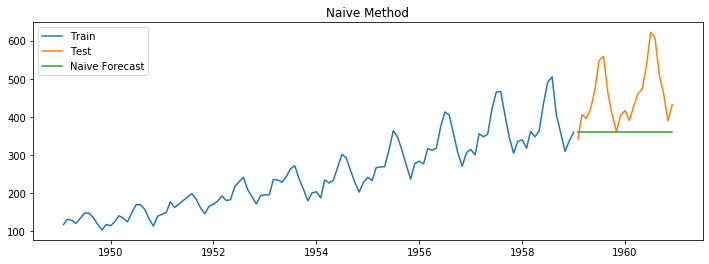

In [17]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_naive['Naive_Forecast'],label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [18]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Passenger"], y_hat_naive['Naive_Forecast'])).round(2)
#MAPE
mape = np.round(np.mean(np.abs(test['Passenger']-y_hat_naive['Naive_Forecast'])/test['Passenger'])*100,2)

### Simple Average Method

In [19]:
y_hat_avg = test.copy()
y_hat_avg['Average_Forecast'] = train['Passenger'].mean()

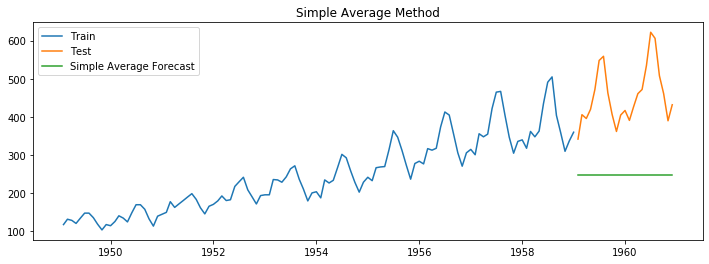

In [20]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_avg['Average_Forecast'],label = 'Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [21]:
#RMSE
rmse_sa = np.sqrt(mean_squared_error(test["Passenger"], y_hat_avg['Average_Forecast'])).round(2)
#MAPE
mape_sa = np.round(np.mean(np.abs(test['Passenger']-y_hat_avg['Average_Forecast'])/test['Passenger'])*100,2)

In [22]:
results = pd.DataFrame({"Methods":['Naive Method','Simple Average'],"MAPE":[mape,mape_sa],'RMSE':[rmse,rmse_sa]})
results

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.4
1,Simple Average,44.36,221.2


### Simpe Moving Average Method

In [23]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['SMA_Forecast'] = df['Passenger'].rolling(ma_window).mean()
y_hat_sma['SMA_Forecast'][train_len:] = y_hat_sma['SMA_Forecast'][train_len-1]

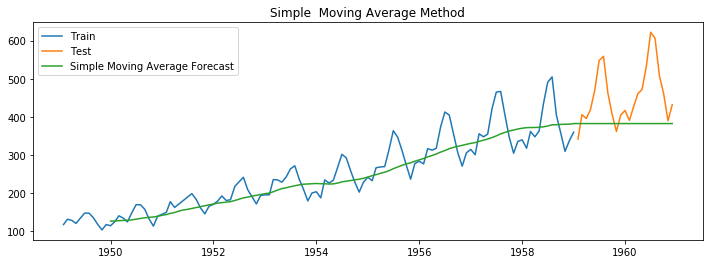

In [24]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_sma['SMA_Forecast'],label = 'Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title("Simple  Moving Average Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [25]:
#RMSE
rmse_sma = np.sqrt(mean_squared_error(test["Passenger"], y_hat_sma['SMA_Forecast'][train_len:])).round(2)
#MAPE
mape_sma = np.round(np.mean(np.abs(test['Passenger']-y_hat_sma['SMA_Forecast'][train_len:])/test['Passenger'])*100,2)

tempresults = pd.DataFrame({"Methods":['Simple Moving Average Method'],"MAPE":[mape_sma],'RMSE':[rmse_sma]})
result = pd.concat([results,tempresults])

In [26]:
result

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28


### SImple Exponential Smoothing Method


In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
model = SimpleExpSmoothing(train['Passenger'])
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['SES_Forecast'] = model_fit.forecast(24)

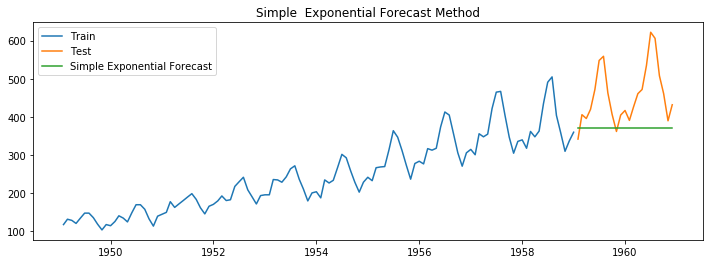

In [29]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_ses['SES_Forecast'],label = 'Simple Exponential Forecast')
plt.legend(loc='best')
plt.title("Simple  Exponential Forecast Method")
plt.show()

### Root Mean Squared Error & Mean Absolute Percentage error

In [30]:
#RMSE
rmse_ses = np.sqrt(mean_squared_error(test["Passenger"], y_hat_ses['SES_Forecast'])).round(2)
#MAPE
mape_ses = np.round(np.mean(np.abs(test['Passenger']-y_hat_ses['SES_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['Simple Exponential Smoothing Method'],"MAPE":[mape_ses],'RMSE':[rmse_ses]})
result1 = pd.concat([result,tempresults1])
result1

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15


## Holt's Exponential Smoothing Method using trends

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
np.asarray(train['Passenger'])

array([118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118.,
       115., 126., 141., 135., 125., 149., 170., 170., 158., 133., 114.,
       140., 145., 150., 178., 163., 172., 181., 190., 199., 184., 162.,
       146., 166., 171., 180., 193., 181., 183., 218., 230., 242., 209.,
       191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
       237., 211., 180., 201., 204., 188., 235., 227., 234., 268., 302.,
       293., 259., 229., 203., 229., 242., 233., 267., 269., 270., 315.,
       364., 347., 312., 274., 237., 278., 284., 277., 317., 313., 318.,
       374., 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
       355., 422., 465., 467., 404., 347., 305., 336., 340., 318., 362.,
       348., 363., 435., 491., 505., 404., 359., 310., 337., 360.])

In [33]:
model = ExponentialSmoothing(np.asarray(train['Passenger']),seasonal_periods = 12,trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()

y_hat_holt['HOLT_Forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 118.0, 'initial_slope': 14.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


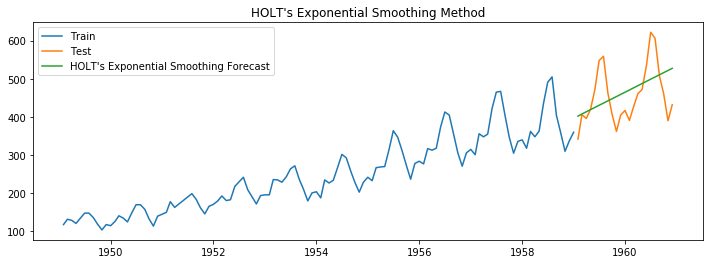

In [34]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_holt['HOLT_Forecast'],label = 'HOLT\'s Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT\'s Exponential Smoothing Method")
plt.show()

In [35]:
#RMSE
rmse_holt = np.sqrt(mean_squared_error(test["Passenger"], y_hat_holt['HOLT_Forecast'])).round(2)
#MAPE
mape_holt = np.round(np.mean(np.abs(test['Passenger']-y_hat_holt['HOLT_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT\'s Exponential Smoothing Method'],"MAPE":[mape_holt],'RMSE':[rmse_holt]})
result2 = pd.concat([result1,tempresults1])
result2

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27


## Holt-Winters Additive Method with Trend and Seasonality

In [36]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passenger']), seasonal_periods = 12, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwa['HWA_Forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.26315789253486876, 'smoothing_slope': 0.05053479831399255, 'smoothing_seasonal': 0.7368421030611846, 'damping_slope': nan, 'initial_level': 206.84462792649353, 'initial_slope': 2.094327161015531, 'initial_seasons': array([ -90.22522905,  -76.40603275,  -79.66930323,  -87.75806009,
        -73.74482772,  -60.81774343,  -61.01333028,  -73.21638117,
        -90.37116943, -105.25649857,  -90.91910945,  -93.85787533]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


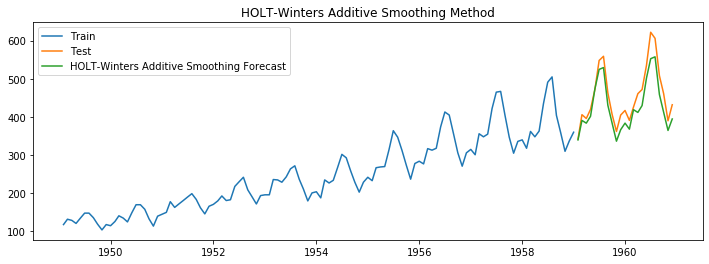

In [37]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_hwa['HWA_Forecast'],label = 'HOLT-Winters Additive Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT-Winters Additive Smoothing Method")
plt.show()

In [38]:
#RMSE
rmse_hwa = np.sqrt(mean_squared_error(test["Passenger"], y_hat_hwa['HWA_Forecast'])).round(2)
#MAPE
mape_hwa = np.round(np.mean(np.abs(test['Passenger']-y_hat_hwa['HWA_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT-Winters Additive Smoothing Method'],"MAPE":[mape_hwa],'RMSE':[rmse_hwa]})
result3 = pd.concat([result2,tempresults1])
result3

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13


## Holt-Winters Multiplicative Method with Trend and Seasonality

In [39]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passenger']), seasonal_periods = 12, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwm['HWM_Forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.26315789253486876, 'smoothing_slope': 0.05053479831399255, 'smoothing_seasonal': 0.7368421030611846, 'damping_slope': nan, 'initial_level': 206.84462792649353, 'initial_slope': 2.094327161015531, 'initial_seasons': array([ -90.22522905,  -76.40603275,  -79.66930323,  -87.75806009,
        -73.74482772,  -60.81774343,  -61.01333028,  -73.21638117,
        -90.37116943, -105.25649857,  -90.91910945,  -93.85787533]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


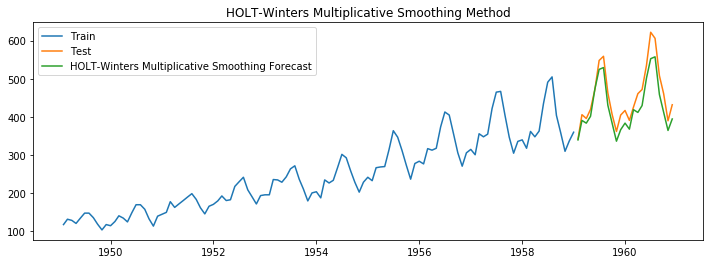

In [40]:
#Plotting test,train and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label = 'Train')
plt.plot(test['Passenger'],label = 'Test')
plt.plot(y_hat_hwm['HWM_Forecast'],label = 'HOLT-Winters Multiplicative Smoothing Forecast')
plt.legend(loc='best')
plt.title("HOLT-Winters Multiplicative Smoothing Method")
plt.show()

In [41]:
#RMSE
rmse_hwm = np.sqrt(mean_squared_error(test["Passenger"], y_hat_hwm['HWM_Forecast'])).round(2)
#MAPE
mape_hwm = np.round(np.mean(np.abs(test['Passenger']-y_hat_hwm['HWM_Forecast'])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['HOLT-Winters Multiplicative Smoothing Method'],"MAPE":[mape_hwm],'RMSE':[rmse_hwm]})
result4 = pd.concat([result3,tempresults1])
result4

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13


## Autoregressive models 

### Stationary vs. Non-Stationary

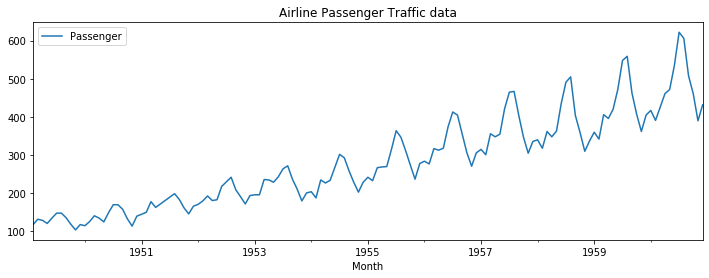

In [42]:
#time series plt
df['Passenger'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic data')
plt.show()

### Augmented Dickey-Fuller(ADF) test
- Null Hypothesis(H0) : The series is not stationary and satisfies for p-value > 0.05.
- ALternate Hypothesis(H1) : The series is stationary and satisfies for p-value <= 0.05.

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
adf_test = adfuller(df['Passenger'])
print('ADF Statistics %f' %adf_test[0])
print('Critical Value @0.05: %.2f' %adf_test[4]['5%'])
print('P-Value @0.05: %f' %adf_test[1])

ADF Statistics 0.866288
Critical Value @0.05: -2.88
P-Value @0.05: 0.992634


In [45]:
adf_test

(0.8662877034110231,
 0.9926342166999335,
 13,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 987.0122130671182)

### KPSS Test
- Null Hypothesis(H0) : The series is stationary and satisfies for p-value > 0.05.
- ALternate Hypothesis(H1) : The series is not stationary and satisfies for p-value <= 0.05. 

In [46]:
from statsmodels.tsa.stattools import kpss

In [47]:
kpss_test = kpss(df['Passenger'])
print('KPSS Statistics %f' %kpss_test[0])
print('Critical Value @0.05: %.2f' %kpss_test[3]['5%'])
print('P-Value @0.05: %f' %kpss_test[1])

KPSS Statistics 1.044840
Critical Value @0.05: 0.46
P-Value @0.05: 0.010000


Thus, clearly from both the test and visually analysing the times series we can say that the time series is "not stationary".

### BOX COX transformation

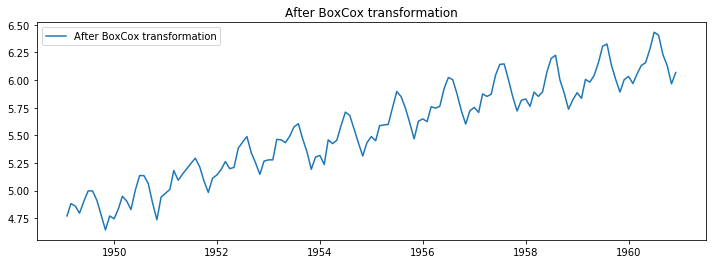

In [48]:
from scipy.stats import boxcox
df_boxcox = pd.Series(boxcox(df['Passenger'], lmbda =0), index = df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox,label='After BoxCox transformation')
plt.legend(loc='best')
plt.title('After BoxCox transformation')
plt.show()

`Now, we can clearly see that fluctuation at the end of the time series has been reduced thus we have stabilized the variance to constant.

### Differencing

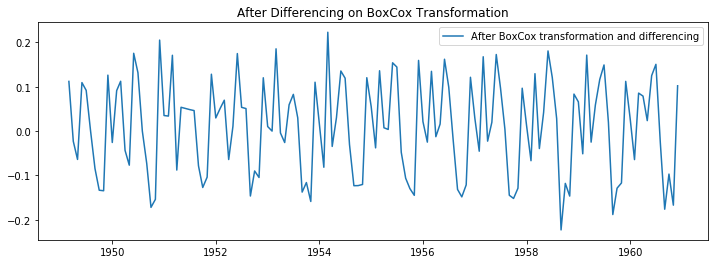

In [49]:
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), index=df.index)
#since we are using shift operator thus we do not require the 1st row as it is not going to capture
df_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.title('After Differencing on BoxCox Transformation')
plt.plot(df_boxcox_diff,label='After BoxCox transformation and differencing')
plt.legend(loc='best')
plt.show()

After applying differencing on BoxCox Transformation:
- we can see that variance has become nearly constant.
- mean  look near to 0.
- covariance or fluctuation at fixed lag seems constant.

Now we will use ADF and KPSS test to check whether we are right or not.

### ADF TEST 

In [50]:
#ADF Test
adf_test = adfuller(df_boxcox_diff)
print('ADF Statistics %f' %adf_test[0])
print('Critical Value @0.05: %.2f' %adf_test[4]['5%'])
print('P-Value @0.05: %f' %adf_test[1])

ADF Statistics -3.267370
Critical Value @0.05: -2.88
P-Value @0.05: 0.016402


Since, the p-value for ADF test <= 0.05 thus we reject the null hypothesis.
And the alternate hypothesis says that the time series is "stationary".

### KPSS TEST

In [51]:
#KPSS Test
kpss_test = kpss(df_boxcox_diff)
print('KPSS Statistics %f' %kpss_test[0])
print('Critical Value @0.05: %.2f' %kpss_test[3]['5%'])
print('P-Value @0.05: %f' %kpss_test[1])

KPSS Statistics 0.090523
Critical Value @0.05: 0.46
P-Value @0.05: 0.100000


Since, the p-value for KPSS test > 0.05 thus we accept the null hypothesis.
And the null hypothesis says that the time series is "stationary".

### Autocorrelation function ACF plot

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

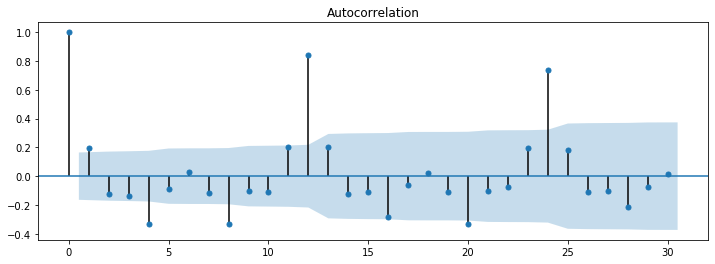

In [53]:
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff,ax=plt.gca(), lags=30)
plt.show()

### Partial Autocorrelation Function PACF Plot

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf

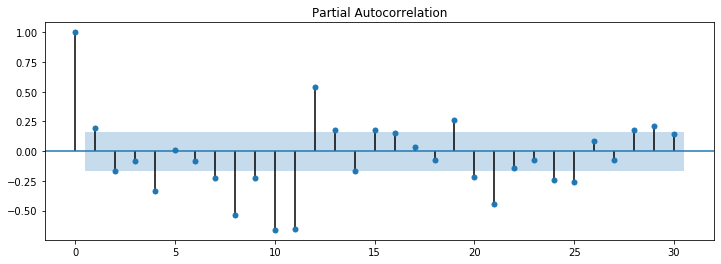

In [55]:
plt.figure(figsize=(12,4))
plot_pacf(df_boxcox_diff,ax=plt.gca(), lags=30)
plt.show()

### Splitting into train and test datasets

In [56]:
train_df_boxcox = df_boxcox[:train_len]
test_df_boxcox = df_boxcox[train_len:]
train_df_boxcox_diff = df_boxcox_diff[:train_len-1] #train_len-1 since we previously dropped the the 1st row while computing difference
test_df_boxcox_diff = df_boxcox_diff[train_len-1:]

## Autoreggresion model(AR)

In [57]:
from statsmodels.tsa.arima_model import ARIMA # since, AR model is the subsequenyt of ARIMA model with only using p parameter
model = ARIMA(train_df_boxcox_diff, order = (1,0,0)) #order = (1,0,0) means the simplest AR model with lag 1
model_fit = model.fit()
print(model_fit.params)


const      0.009674
ar.L1.y    0.183689
dtype: float64


Thus, beta-0 = 0.0096 which is the constant and beta-1 = 0.18 which will be multipled to lag 1 observation.

### Recover original time series forecast
Since, we have applied boxcox transformation and differencing to get a stationary series in order to get back the originall time series, we do as follows:-


In [58]:
y_hat_ar = df_boxcox_diff.copy()
y_hat_ar['AR_Forecast_Boxcox_Difference'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
#this "df_boxcox_diff.index.min(), df_bxcox_diff.index.max()" helps to predict on whole observation.
#Since, df_boxcox_diff.index.min() give us the 1st date and df_boxcox_diff.index.max() give us the latest date
y_hat_ar['AR_Forecast_Boxcox'] = y_hat_ar['AR_Forecast_Boxcox_Difference'].cumsum()
# cumsum() = Cummalative sum, opposite of differencing, as we are integrating to the original series
y_hat_ar['AR_Forecast_Boxcox'] = y_hat_ar['AR_Forecast_Boxcox'].add(df_boxcox[0])
# as we have to add the 1st row backas we removed while doing differencing
y_hat_ar['AR_Forecast'] = np.exp(y_hat_ar['AR_Forecast_Boxcox'])
# Since boxcox transformation is nothing but log transformation so using antilog i,e. exponetial function we will get the original time series


### Plot train test and forecast data

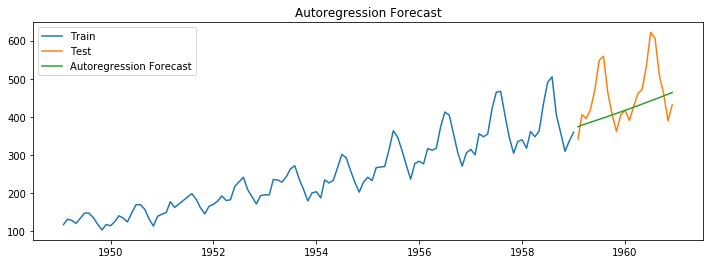

In [59]:
plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label='Train')
plt.plot(test['Passenger'],label='Test')
plt.plot(y_hat_ar['AR_Forecast'][test.index.min():],label='Autoregression Forecast')
plt.legend(loc='best')
plt.title('Autoregression Forecast')
plt.show()

In [60]:
#RMSE
rmse_ar = np.sqrt(mean_squared_error(test["Passenger"], y_hat_ar['AR_Forecast'][test.index.min():])).round(2)
#MAPE
mape_ar = np.round(np.mean(np.abs(test['Passenger']-y_hat_ar['AR_Forecast'][test.index.min():])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['Autoregression model '],"MAPE":[mape_ar],'RMSE':[rmse_ar]})
result5 = pd.concat([result4,tempresults1])
result5

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
0,Autoregression model,11.52,79.56


## Moving Average(MA) model

In [61]:
model = ARIMA(train_df_boxcox_diff, order = (0,0,1)) #(0,0,1) INDICATES (0,0,q(windowsize))
model_fit = model.fit()
print(model_fit.params)

const      0.009669
ma.L1.y    0.268926
dtype: float64


### Recover the original time series forecast

In [62]:
y_hat_ma = df_boxcox_diff.copy()
y_hat_ma['MA_Forecast_Boxcox_Difference'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ma['MA_Forecast_Boxcox'] = y_hat_ma['MA_Forecast_Boxcox_Difference'].cumsum()
y_hat_ma['MA_Forecast_Boxcox']  = y_hat_ma['MA_Forecast_Boxcox'].add(df_boxcox[0])
y_hat_ma['MA_Forecast'] = np.exp(y_hat_ma['MA_Forecast_Boxcox'])

### Plotting Train Test and Forecast

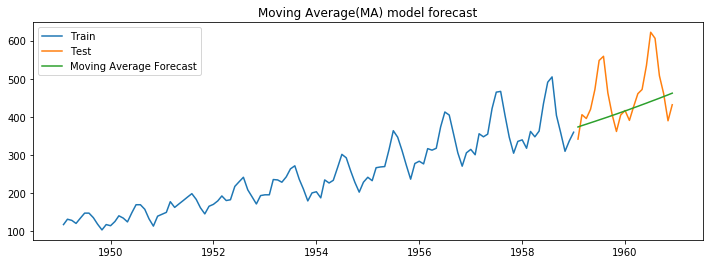

In [63]:
plt.figure(figsize=(12,4))
plt.plot(train['Passenger'], label = 'Train')
plt.plot(test['Passenger'], label = 'Test')
plt.plot(y_hat_ma['MA_Forecast'][test.index.min():], label = 'Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average(MA) model forecast')
plt.show()

In [64]:
#RMSE
rmse_ma = np.sqrt(mean_squared_error(test["Passenger"], y_hat_ma['MA_Forecast'][test.index.min():])).round(2)
#MAPE
mape_ma = np.round(np.mean(np.abs(test['Passenger']-y_hat_ma['MA_Forecast'][test.index.min():])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['Moving Average(MA) model '],"MAPE":[mape_ma],'RMSE':[rmse_ma]})

result6 = pd.concat([result5,tempresults1])
result6

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
0,Autoregression model,11.52,79.56
0,Moving Average(MA) model,11.66,80.33


## Autoregressive Moving Average Model(ARMA) model

In [65]:
model = ARIMA(train_df_boxcox_diff, order = (1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009224
ar.L1.y   -0.534431
ma.L1.y    0.803363
dtype: float64


### Recover original time series forecast

In [66]:
y_hat_arma = df_boxcox_diff.copy()
y_hat_arma['ARMA_Forecast_Boxcox_Difference'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arma['ARMA_Forecast_Boxcox'] = y_hat_arma['ARMA_Forecast_Boxcox_Difference'].cumsum()
y_hat_arma['ARMA_Forecast_Boxcox'] = y_hat_arma['ARMA_Forecast_Boxcox'].add(df_boxcox[0])
y_hat_arma['ARMA_Forecast'] = np.exp(y_hat_arma['ARMA_Forecast_Boxcox'])

### Plot train test and ARMA forecast

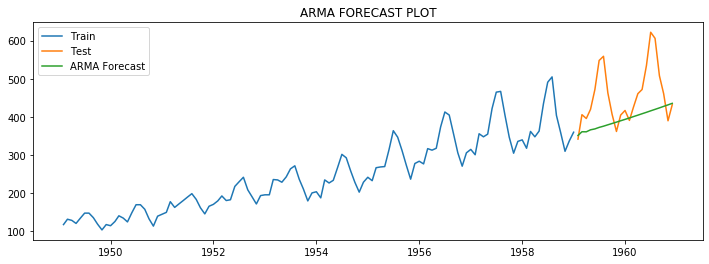

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label='Train')
plt.plot(test['Passenger'], label='Test')
plt.plot(y_hat_arma['ARMA_Forecast'][test.index.min():], label='ARMA Forecast')
plt.legend(loc='best')
plt.title('ARMA FORECAST PLOT')
plt.show()

In [68]:
#RMSE
rmse_arma = np.sqrt(mean_squared_error(test["Passenger"], y_hat_arma['ARMA_Forecast'][test.index.min():])).round(2)
#MAPE
mape_arma = np.round(np.mean(np.abs(test['Passenger']-y_hat_arma['ARMA_Forecast'][test.index.min():])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['(ARMA)Autoregressive Moving Average model '],"MAPE":[mape_arma],'RMSE':[rmse_arma]})

result7 = pd.concat([result6,tempresults1])
result7

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
0,Autoregression model,11.52,79.56
0,Moving Average(MA) model,11.66,80.33
0,(ARMA)Autoregressive Moving Average model,13.80,93.26


## Autoregressive Integrated Moving Average Model(ARIMA)

In [69]:
model = ARIMA(train_df_boxcox ,order=(1,1,1)) #since, previously we have done 1st order differencing to get stationarity,hence,d=1.
model_fit = model.fit()
print(model_fit.params)

const        0.009224
ar.L1.D.y   -0.534431
ma.L1.D.y    0.803363
dtype: float64


### Recover Original Time Series Forecast

In [70]:
y_hat_arima = df_boxcox_diff.copy()
y_hat_arima['ARIMA_Forecast_Boxcox_Difference'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['ARIMA_Forecast_Boxcox'] = y_hat_arima['ARIMA_Forecast_Boxcox_Difference'].cumsum()
y_hat_arima['ARIMA_Forecast_Boxcox'] = y_hat_arima['ARIMA_Forecast_Boxcox'].add(df_boxcox[0])
y_hat_arima['ARIMA_Forecast'] = np.exp(y_hat_arima['ARIMA_Forecast_Boxcox'])

### Plot Train Test and Forecast

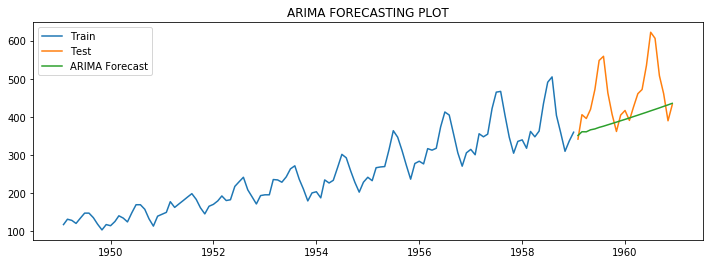

In [71]:
plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label='Train')
plt.plot(test['Passenger'],label='Test')
plt.plot(y_hat_arima['ARIMA_Forecast'][test.index.min():],label = 'ARIMA Forecast')
plt.title('ARIMA FORECASTING PLOT')
plt.legend(loc='best')
plt.show()

In [72]:
#RMSE
rmse_arima = np.sqrt(mean_squared_error(test["Passenger"], y_hat_arima['ARIMA_Forecast'][test.index.min():])).round(2)
#MAPE
mape_arima = np.round(np.mean(np.abs(test['Passenger']-y_hat_arima['ARIMA_Forecast'][test.index.min():])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['(ARIMA)Autoregressive Integrated Moving Average model '],"MAPE":[mape_arima],'RMSE':[rmse_arima]})

result8 = pd.concat([result7,tempresults1])
result8

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
0,Autoregression model,11.52,79.56
0,Moving Average(MA) model,11.66,80.33
0,(ARMA)Autoregressive Moving Average model,13.80,93.26


## Seasonal Autoregressive Integrated Moving Average Model(SARIMA)

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
model = SARIMAX(train_df_boxcox, order = (1,1,1), seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.391274
ma.L1      -0.691386
ar.S.L12   -0.049275
ma.S.L12   -0.510226
sigma2      0.001415
dtype: float64


### Recover Original Time Series

In [75]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['SARIMA_Forecast_Boxcox'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
#SARIMAX function has inbuild constant addig and  boxcox integration

y_hat_sarima['SARIMA_Forecast'] = np.exp(y_hat_sarima['SARIMA_Forecast_Boxcox'])

### Plot Train TEst and Forecast


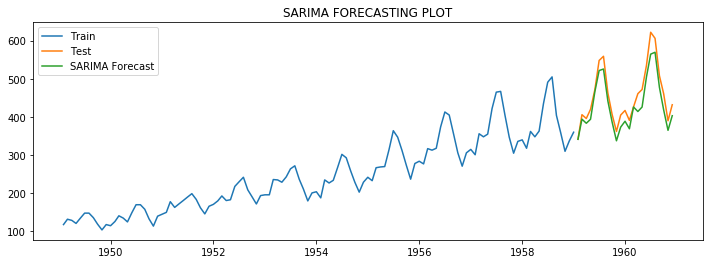

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label='Train')
plt.plot(test['Passenger'],label='Test')
plt.plot(y_hat_sarima['SARIMA_Forecast'][test.index.min():],label = 'SARIMA Forecast')
plt.title('SARIMA FORECASTING PLOT')
plt.legend(loc='best')
plt.show()

In [77]:
#RMSE
rmse_sarima = np.sqrt(mean_squared_error(test["Passenger"], y_hat_sarima['SARIMA_Forecast'][test.index.min():])).round(2)
#MAPE
mape_sarima = np.round(np.mean(np.abs(test['Passenger']-y_hat_sarima['SARIMA_Forecast'][test.index.min():])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['(SARIMA)Seasonal Autoregressive Integrated Moving Average model '],"MAPE":[mape_sarima],'RMSE':[rmse_sarima]})

result9 = pd.concat([result8,tempresults1])
result9

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
0,Autoregression model,11.52,79.56
0,Moving Average(MA) model,11.66,80.33
0,(ARMA)Autoregressive Moving Average model,13.80,93.26


## Seasonal Autoregressive Integrated Moving Average Model with Exogenous Variable (SARIMAX)

In [78]:
promo = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\promotion.csv",header=None)

In [79]:
promo

,0,1
0,1949-01,0
1,1949-02,0
2,1949-03,0
3,1949-04,0
4,1949-05,0
...,...,...
139,1960-08,1
140,1960-09,1
141,1960-10,1
142,1960-11,0


In [80]:
promo.columns = ['Month','Event']
promo['Month'] = pd.to_datetime(promo['Month'], format = '%Y-%m')
promo = promo.set_index('Month')
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
...,...
1960-08-01,1
1960-09-01,1
1960-10-01,1


In [81]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

In [82]:
train_df_boxcox = train_df_boxcox.values.reshape(-1,1)
#this is to solve the problem of "indices not aligned"

In [83]:
model = SARIMAX(train_df_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12), exog = promo_train)
model_fit = model.fit()
print(model_fit.params)

Event      -0.018978
ar.L1       0.432338
ma.L1      -0.710912
ar.S.L12   -0.092425
ma.S.L12   -0.472843
sigma2      0.001400
dtype: float64


### Recover Original Time Series

In [84]:
y_hat_sarimax = df_boxcox_diff.copy()
y_hat_sarimax['SARIMAX_Forecast_Boxcox'] = model_fit.predict(test.index.min(),test.index.max(),exog = promo_test)
y_hat_sarimax['SARIMAX_Forecast'] = np.exp(y_hat_sarimax['SARIMAX_Forecast_Boxcox'])

### Plot Train Test and Forecast

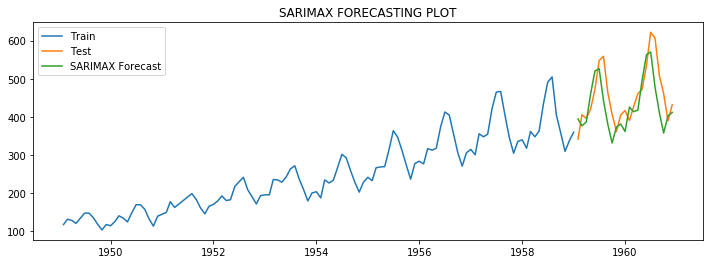

In [85]:
plt.figure(figsize=(12,4))
plt.plot(train['Passenger'],label='Train')
plt.plot(test['Passenger'],label='Test')
plt.plot(y_hat_sarimax['SARIMAX_Forecast'][test.index.min():],label = 'SARIMAX Forecast')
plt.title('SARIMAX FORECASTING PLOT')
plt.legend(loc='best')
plt.show()

In [86]:
#RMSE
rmse_sarimax = np.sqrt(mean_squared_error(test["Passenger"], y_hat_sarimax['SARIMAX_Forecast'][test.index.min():])).round(2)
#MAPE
mape_sarimax = np.round(np.mean(np.abs(test['Passenger']-y_hat_sarimax['SARIMAX_Forecast'][test.index.min():])/test['Passenger'])*100,2)

tempresults1 = pd.DataFrame({"Methods":['(SARIMAX)Seasonal Autoregressive Integrated Moving Average with Exogenous Variable model '],"MAPE":[mape_sarimax],'RMSE':[rmse_sarimax]})

result10 = pd.concat([result9,tempresults1])
result10

,Methods,MAPE,RMSE
0,Naive Method,19.68,121.40
1,Simple Average,44.36,221.20
0,Simple Moving Average Method,15.67,104.28
0,Simple Exponential Smoothing Method,17.55,112.15
0,HOLT's Exponential Smoothing Method,12.75,71.27
0,HOLT-Winters Additive Smoothing Method,6.37,34.13
0,HOLT-Winters Multiplicative Smoothing Method,6.37,34.13
0,Autoregression model,11.52,79.56
0,Moving Average(MA) model,11.66,80.33
0,(ARMA)Autoregressive Moving Average model,13.80,93.26
